In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
with zipfile.ZipFile('/content/diabetes+130-us+hospitals+for+years+1999-2008.zip', 'r') as zip_ref:
  with zip_ref.open('diabetic_data.csv') as csv_file:
    data = pd.read_csv(csv_file)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [ ]:
data.drop(['encounter_id', 'patient_nbr', 'weight', 'payer_code', 'medical_specialty','diag_1','diag_2','diag_3','examide','citoglipton'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 40 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101766 non-null  object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   admission_type_id         101766 non-null  int64 
 4   discharge_disposition_id  101766 non-null  int64 
 5   admission_source_id       101766 non-null  int64 
 6   time_in_hospital          101766 non-null  int64 
 7   num_lab_procedures        101766 non-null  int64 
 8   num_procedures            101766 non-null  int64 
 9   num_medications           101766 non-null  int64 
 10  number_outpatient         101766 non-null  int64 
 11  number_emergency          101766 non-null  int64 
 12  number_inpatient          101766 non-null  int64 
 13  number_diagnoses          101766 non-null  int64 
 14  max_

In [ ]:
le = LabelEncoder()
for i in data.columns:
  if data[i].dtype == 'object':
    data[i] = le.fit_transform(data[i])

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 40 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   race                      101766 non-null  int64
 1   gender                    101766 non-null  int64
 2   age                       101766 non-null  int64
 3   admission_type_id         101766 non-null  int64
 4   discharge_disposition_id  101766 non-null  int64
 5   admission_source_id       101766 non-null  int64
 6   time_in_hospital          101766 non-null  int64
 7   num_lab_procedures        101766 non-null  int64
 8   num_procedures            101766 non-null  int64
 9   num_medications           101766 non-null  int64
 10  number_outpatient         101766 non-null  int64
 11  number_emergency          101766 non-null  int64
 12  number_inpatient          101766 non-null  int64
 13  number_diagnoses          101766 non-null  int64
 14  max_glu_serum       

In [ ]:
data.head(50)

race  gender  age  admission_type_id  discharge_disposition_id  \
0      3       0    0                  6                        25   
1      3       0    1                  1                         1   
2      1       0    2                  1                         1   
3      3       1    3                  1                         1   
4      3       1    4                  1                         1   
5      3       1    5                  2                         1   
6      3       1    6                  3                         1   
7      3       1    7                  1                         1   
8      3       0    8                  2                         1   
9      3       0    9                  3                         3   
10     1       0    4                  1                         1   
11     1       1    6                  2                         1   
12     3       0    4                  1                         3   
13     3       1    8                  1                         6   
14     1       0    6                  3                         1   
15     1       1    6                  1                         3   
16     1       1    5                  1                         1   
17     3       0    5                  1                         1   
18     1       1    7                  1                         1   
19     0       1    7                  3                         6   
20     0       0    5                  2                         1   
21     0       1    6                  2                         1   
22     1       0    7                  2                         1   
23     3       0    8                  2                         6   
24     1       0    7                  3                         1   
25     5       0    5                  1                         1   
26     3       1    8                  1                         3   
27     3       0    5                  1                         1   
28     3       1    2                  2                         1   
29     3       0    8                  1                         2   
30     1       0    6                  1                         1   
31     1       1    7                  1                         5   
32     3       0    7                  1                         1   
33     3       1    6                  2                         6   
34     3       0    7                  2                        11   
35     3       0    6                  1                         1   
36     3       0    7                  3                         1   
37     3       0    6                  1                         1   
38     3       1    7                  1                         6   
39     3       1    5                  2                         1   
40     3       0    7                  1                         2   
41     3       1    4                  2                         1   
42     3       0    7                  2                         1   
43     3       1    5                  1                         1   
44     3       0    8                  1                        11   
45     3       0    4                  3                         1   
46     3       0    7                  3                         5   
47     3       1    7                  3                         3   
48     3       1    5                  3                         1   
49     3       1    6                  2                         6   

    admission_source_id  time_in_hospital  num_lab_procedures  num_procedures  \
0                     1                 1                  41               0   
1                     7                 3                  59               0   
2                     7                 2                  11               5   
3                     7                 2                  44               1   
4                     7     

# ***E.D.A***


their is a question for every plot which is the reason for making it

In [ ]:
data.shape

(101766, 40)

In [ ]:
data.describe()

race         gender            age  admission_type_id  \
count  101766.000000  101766.000000  101766.000000      101766.000000   
mean        2.598776       0.462443       6.096702           2.024006   
std         0.938415       0.498649       1.594084           1.445403   
min         0.000000       0.000000       0.000000           1.000000   
25%         3.000000       0.000000       5.000000           1.000000   
50%         3.000000       0.000000       6.000000           1.000000   
75%         3.000000       1.000000       7.000000           3.000000   
max         5.000000       2.000000       9.000000           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.000000          4.000000   
75%                    4.000000             7.000000          6.000000   
max                   28.000000            25.000000         14.000000   

       num_lab_procedures  num_procedures  num_medications  ...  \
count       101766.000000   101766.000000    101766.000000  ...   
mean            43.095641        1.339730        16.021844  ...   
std             19.674362        1.705807         8.127566  ...   
min              1.000000        0.000000         1.000000  ...   
25%             31.000000        0.000000        10.000000  ...   
50%             44.000000        1.000000        15.000000  ...   
75%             57.000000        2.000000        20.000000  ...   
max            132.000000        6.000000        81.000000  ...   

          tolazamide        insulin  glyburide-metformin  glipizide-metformin  \
count  101766.000000  101766.000000        101766.000000        101766.000000   
mean        0.000393       1.405469             1.006898             0.000128   
std         0.020312       0.838798             0.084414             0.011302   
min         0.000000       0.000000             0.000000             0.000000   
25%         0.000000       1.000000             1.000000             0.000000   
50%         0.000000       1.000000             1.000000             0.000000   
75%         0.000000       2.000000             1.000000             0.000000   
max         2.000000       3.000000             3.000000             1.000000   

       glimepiride-pioglitazone  metformin-rosiglitazone  \
count             101766.000000            101766.000000   
mean                   0.000010                 0.000020   
std                    0.003135                 0.004433   
min                    0.000000                 0.000000   
25%                    0.000000                 0.000000   
50%                    0.000000                 0.000000   
75%                    0.000000                 0.000000   
max                    1.000000                 1.000000   

       metformin-pioglitazone         change    diabetesMed     readmitted  
count           101766.000000  101766.000000  101766.000000  101766.000000  
mean                 0.000010       0.538048       0.770031       1.427520  
std                  0.003135       0.498553       0.420815       0.684068  
min                  0.000000       0.000000       0.000000       0.000000  
25%                  0.000000       0.000000       1.000000       1.000000  
50%                  0.000000       1.000000       1.000000       2.000000  
75%                  0.000000       1.000000       1.000000       2.000000  
max                  1.000000       1.000000       1.000000       2.000000  

[8 rows x 40 columns]

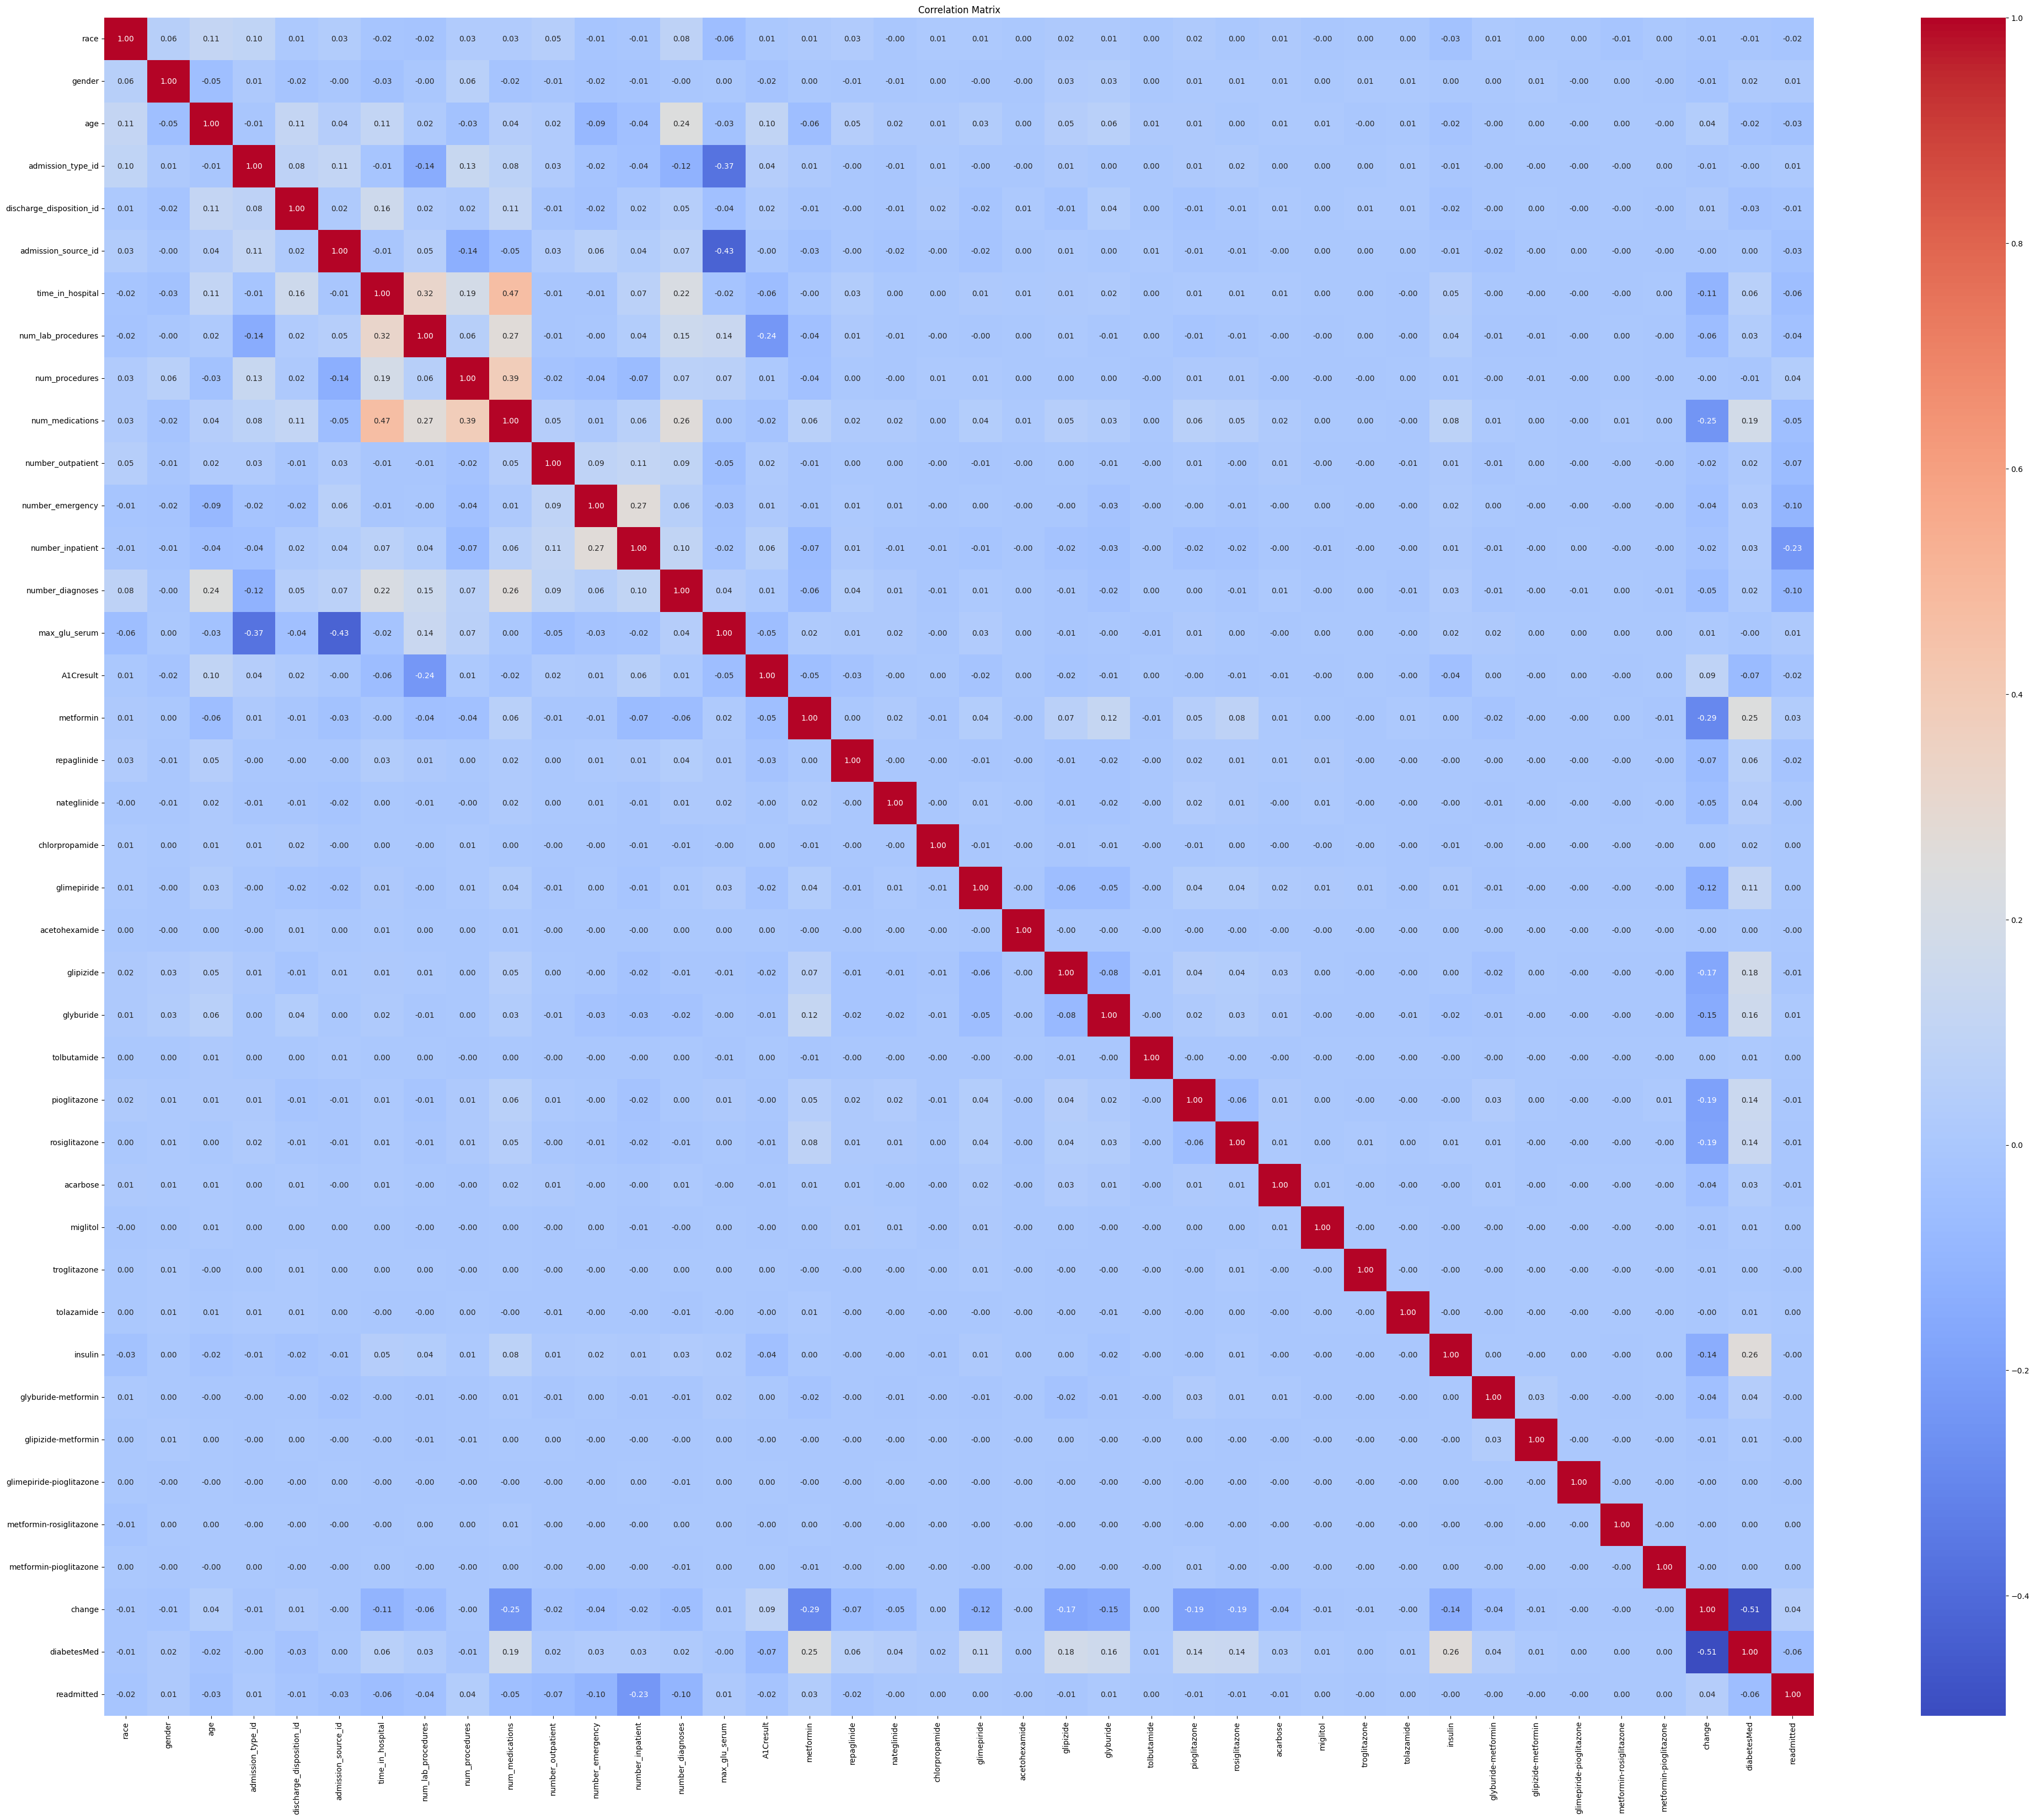

In [ ]:
# Question: Which variables are closely associated with readmissions?


correlation_matrix = data.corr()
plt.figure(figsize=(50, 40))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

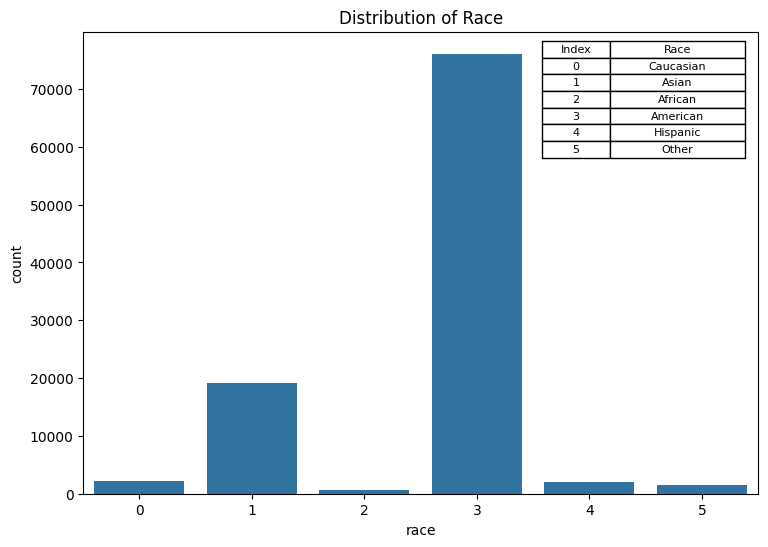

In [ ]:
# Question:What is the racial distribution of patients?

race_labels = ['Caucasian', 'Asian', 'African', 'American', 'Hispanic', 'Other']
index_table_data = [[i, label] for i, label in enumerate(race_labels)]

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='race')
plt.title("Distribution of Race")


table = plt.table(cellText=index_table_data,
                  colLabels=['Index', 'Race'],
                  cellLoc='center',
                  loc='upper right',
                  colWidths=[0.1, 0.2])

table.auto_set_font_size(False)
table.set_fontsize(8)
plt.subplots_adjust(right=0.8)

plt.show()

The majority of patients (over 70,000) belong to the "American" category, while all other racial groups have considerably fewer counts, with "Asian" and "African" being the next largest groups.

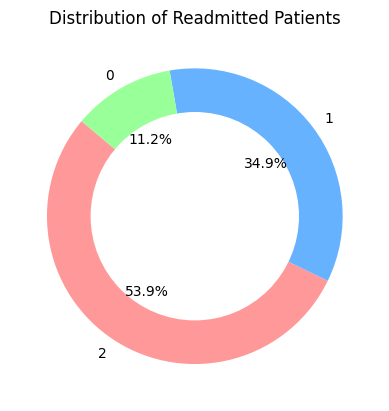

In [ ]:
# Question:How often do patients get readmitted?

labels = data['readmitted'].value_counts().index
sizes = data['readmitted'].value_counts().values
colors = ['#FF9999', '#66B2FF', '#99FF99']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Readmitted Patients')
plt.gca().add_artist(plt.Circle((0, 0), 0.7, color='white'))
plt.show()

The majority of patients (53.9%) were readmitted two or more times, while 34.9% were readmitted once. Only 11.2% were not readmitted, highlighting a high rate of repeated readmissions.


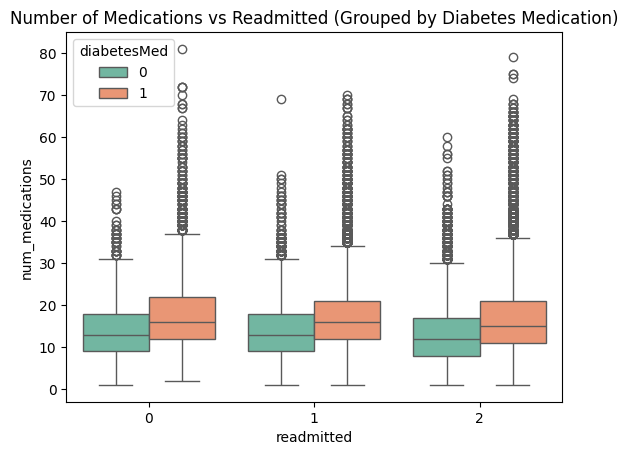

In [ ]:
# Question: Are patients on insulin or diabetesMed more likely to get readmitted?


sns.boxplot(x='readmitted', y='num_medications', hue='diabetesMed', data=data, palette='Set2')
plt.title('Number of Medications vs Readmitted (Grouped by Diabetes Medication)')
plt.show()


Patients prescribed diabetes medication generally have a higher median number of medications across all readmission statuses. The number of medications varies widely, but no clear trend links higher medication counts to increased readmissions.

Text(0, 0.5, 'Frequency')

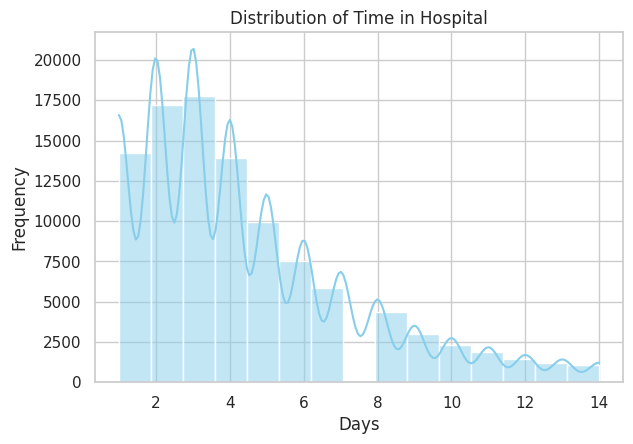

In [ ]:
# Question:What is the distribution of patients' time spent in the hospital?

sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(data['time_in_hospital'], kde=True, bins=15, color="skyblue")
plt.title('Distribution of Time in Hospital')
plt.xlabel('Days')
plt.ylabel('Frequency')


Most patients stay in the hospital for 3–4 days, with the frequency declining as the duration increases. Hospital stays longer than 7 days are less common.

Text(0, 0.5, 'Frequency')

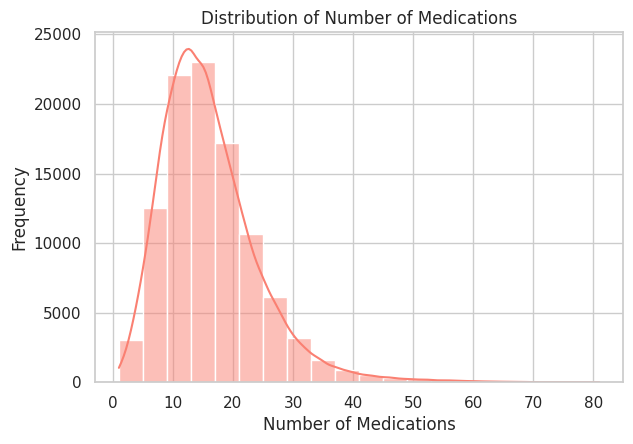

In [ ]:
# Question: What is the distribution of the number of medications prescribed to patients?

sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 2)
sns.histplot(data['num_medications'], kde=True, bins=20, color="salmon")
plt.title('Distribution of Number of Medications')
plt.xlabel('Number of Medications')
plt.ylabel('Frequency')


The number of medications follows a right-skewed distribution, with most patients prescribed 5–15 medications. A smaller proportion of patients are prescribed more than 20 medications.

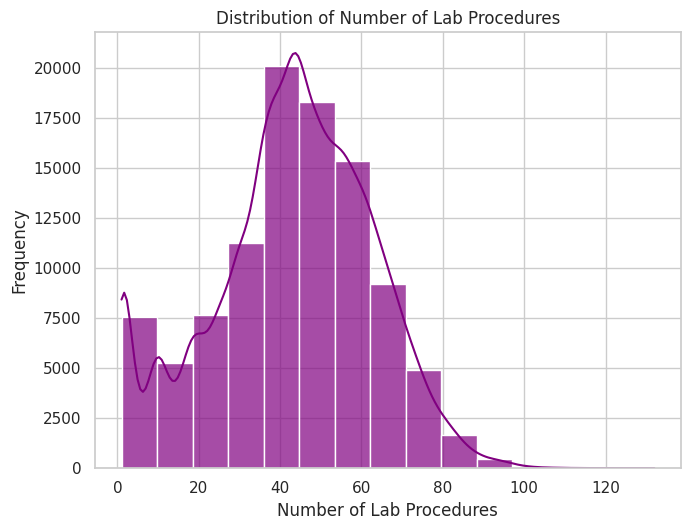

In [ ]:
# Question: What is the distribution of the number of lab procedures?

plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 3)
sns.histplot(data['num_lab_procedures'], bins=15, kde=True, color="purple", alpha=0.7)
plt.title("Distribution of Number of Lab Procedures")
plt.xlabel("Number of Lab Procedures")
plt.ylabel("Frequency")



plt.tight_layout()
plt.show()


Most patients have around 40 lab procedures, with a decreasing frequency for higher counts, showing a right-skewed distribution.

<ipython-input-17-14da4a64b408>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='readmitted', y='num_medications', data=data, palette="muted", scale="width")
<ipython-input-17-14da4a64b408>:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='readmitted', y='num_medications', data=data, palette="muted", scale="width")


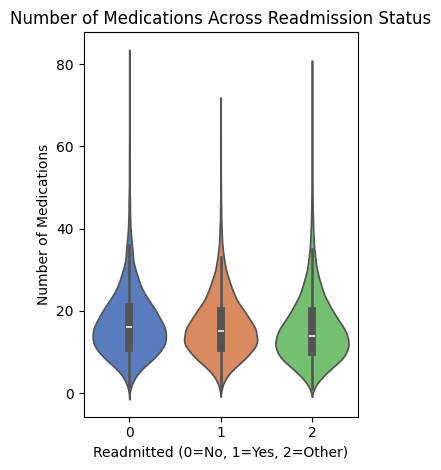

In [ ]:
# Question: How does the number of medications vary with patient readmission status?

plt.subplot(1, 2, 2)
sns.violinplot(x='readmitted', y='num_medications', data=data, palette="muted", scale="width")
plt.title("Number of Medications Across Readmission Status")
plt.xlabel("Readmitted (0=No, 1=Yes, 2=Other)")
plt.ylabel("Number of Medications")

plt.tight_layout()
plt.show()

The distribution of medication counts is quite similar across all readmission statuses, with a slightly wider range for patients who were readmitted.

<ipython-input-21-04219379fc2c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='age', y='time_in_hospital', data=data, palette='muted')


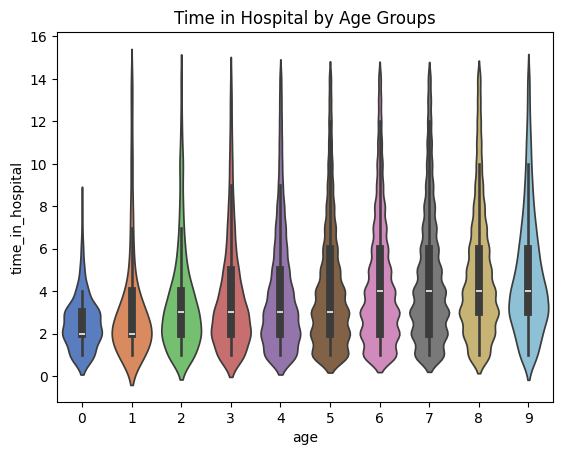

In [ ]:
# Question: Which age groups spend more time in the hospital?


sns.violinplot(x='age', y='time_in_hospital', data=data, palette='muted')
plt.title('Time in Hospital by Age Groups')
plt.show()

Younger patients tend to have shorter hospital stays, while older age groups show more variability and longer stays.

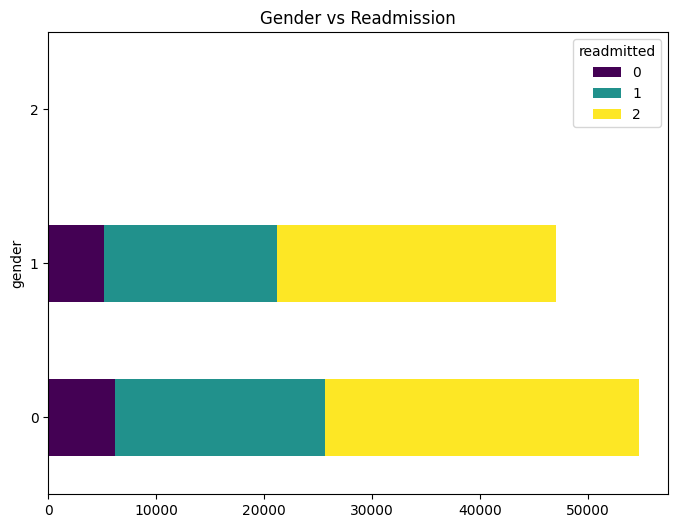

In [ ]:
# Question: How do readmission rates differ between genders?


gender_readmitted = pd.crosstab(data['gender'], data['readmitted'])
gender_readmitted.plot(kind='barh', stacked=True, colormap='viridis', figsize=(8, 6))
plt.title('Gender vs Readmission')
plt.show()


Readmission rates are similar across genders, with the highest portion being for patients readmitted twice, followed by those readmitted once, and the least not readmitted.

<ipython-input-27-17f45289daa4>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby([age_bins, 'insulin', 'diabetesMed', 'readmitted']).size().unstack()


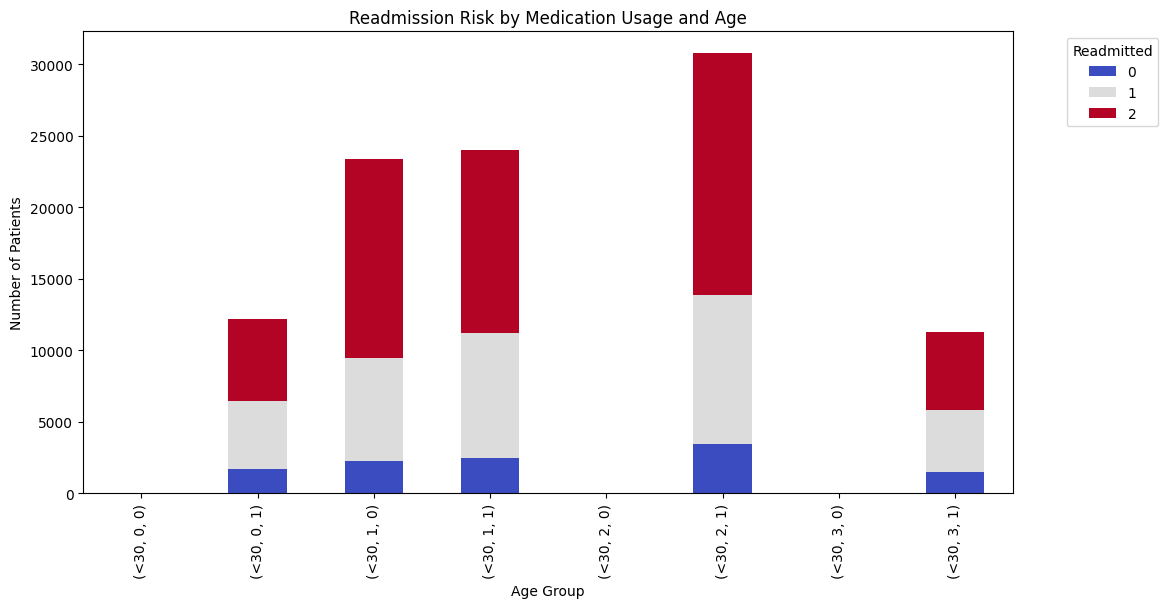

In [ ]:
# Question: How do age and medication usage influence readmission risk?


age_bins = pd.cut(data['age'], bins=[0, 30], labels=['<30'])
grouped = data.groupby([age_bins, 'insulin', 'diabetesMed', 'readmitted']).size().unstack()
grouped.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title('Readmission Risk by Medication Usage and Age')
plt.ylabel('Number of Patients')
plt.xlabel('Age Group')
plt.legend(title='Readmitted', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Younger age groups with higher medication usage tend to have higher readmission risks, as shown by the increasing height of the red and gray segments in the bars. This highlights the need for closer monitoring and tailored interventions for these groups.

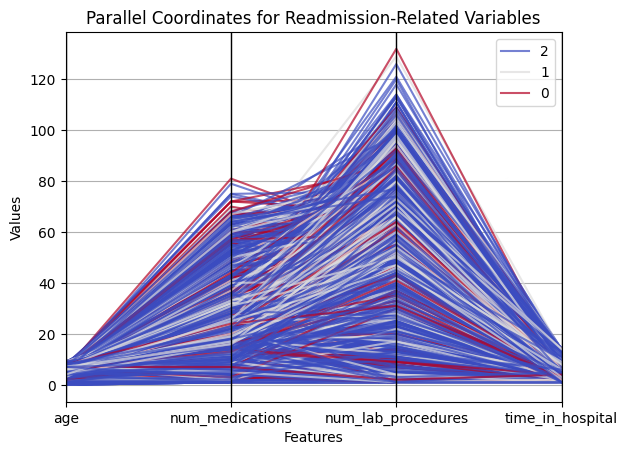

In [ ]:
#Question: How do multiple variables like age, medications, lab procedures, and hospital stay relate to patient readmissions?

from pandas.plotting import parallel_coordinates
parallel_coordinates(data[['readmitted', 'age', 'num_medications', 'num_lab_procedures', 'time_in_hospital']],
                     'readmitted', colormap='coolwarm', alpha=0.7)
plt.title('Parallel Coordinates for Readmission-Related Variables')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()


Patterns and correlations can be observed between age, number of medications, lab procedures, and length of hospital stay, indicating complex interactions affecting patient readmissions.
For example, older patients taking many medications and having more lab procedures tend to be readmitted more often, showing how these factors are interconnected in affecting readmission rates

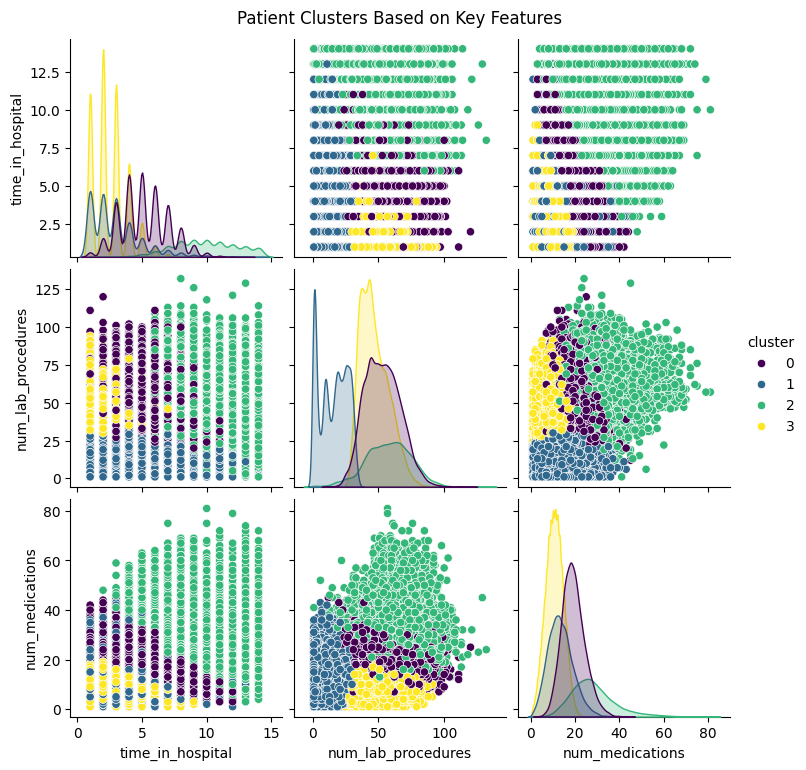

In [ ]:
# Question: How are patients grouped based on their time in hospital, number of lab procedures, and number of medications?

import plotly.graph_objects as go
features = ['time_in_hospital', 'num_lab_procedures', 'num_medications']
scaled_features = StandardScaler().fit_transform(data[features])
kmeans = KMeans(n_clusters=4, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_features)
sns.pairplot(data, vars=features, hue='cluster', palette='viridis', diag_kind='kde')
plt.suptitle('Patient Clusters Based on Key Features', y=1.02)
plt.show()
features = ['time_in_hospital', 'num_lab_procedures', 'num_medications']
scaled_features = StandardScaler().fit_transform(data[features])
kmeans = KMeans(n_clusters=4, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_features)
fig = go.Figure(data=[go.Scatter3d(
    x=data['time_in_hospital'],
    y=data['num_lab_procedures'],
    z=data['num_medications'],
    mode='markers',
    marker=dict(
        size=5,
        color=data['cluster'],
        colorscale='Viridis',
        opacity=0.8
    ),
    text='Cluster: ' + data['cluster'].astype(str)
)])
fig.update_layout(
    title="Interactive 3D Patient Clusters",
    scene=dict(
        xaxis_title='Time in Hospital',
        yaxis_title='Number of Lab Procedures',
        zaxis_title='Number of Medications'
    )
)
fig.show()

Patients are divided into four clusters. Each cluster shows distinct patterns in hospital stay duration, lab procedures, and medication counts, indicating different patient profiles and needs

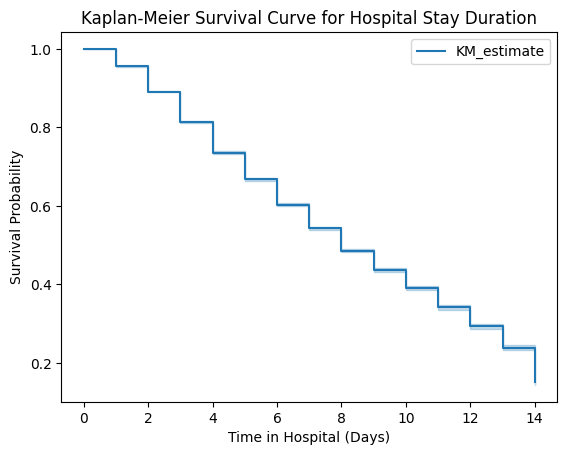

In [ ]:
# Question: how does survival chances affect by the time spent in hospital?


from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(data['time_in_hospital'], event_observed=(data['readmitted'] == 1))

kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve for Hospital Stay Duration')
plt.xlabel('Time in Hospital (Days)')
plt.ylabel('Survival Probability')
plt.show()

Based on the Kaplan-Meier survival curve:As the number of days increases, the probability of patients remaining in the hospital decreases, indicating that most patients are discharged within the first 14 days.

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


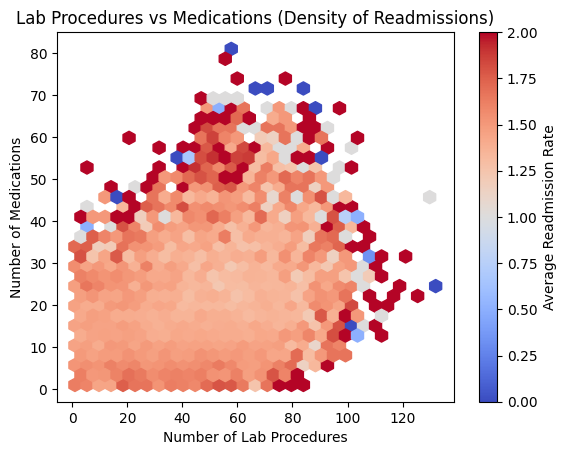

In [ ]:
# Question: How does the density of readmissions vary with the number of lab procedures and medications?


plt.hexbin(
    data['num_lab_procedures'], data['num_medications'],
    C=data['readmitted'], reduce_C_function=np.mean, gridsize=30, cmap='coolwarm')
plt.colorbar(label='Average Readmission Rate')
plt.title('Lab Procedures vs Medications (Density of Readmissions)')
plt.xlabel('Number of Lab Procedures')
plt.ylabel('Number of Medications')
plt.show()


The plot indicates that higher densities of readmissions are associated with a moderate number of lab procedures and a higher number of medications, shown by the darker red areas. This suggests that patients with a high number of medications and a moderate number of lab procedures tend to have higher readmission rates.

In [ ]:
# Question: How does the density of readmissions vary with the number of lab procedures and medications?

fig = px.scatter_matrix(
    data,
    dimensions=['time_in_hospital', 'num_lab_procedures', 'num_medications', 'readmitted'],
    color='readmitted',
    title="Interactive Multi-Feature Comparison",
    labels={'readmitted': 'Readmission Status'},
    color_continuous_scale=px.colors.sequential.Plasma
)
fig.show()


Conclusion: The plot indicates that higher densities of readmissions are associated with a moderate number of lab procedures and a higher number of medications, shown by the darker red areas. This suggests that patients with a high number of medications and a moderate number of lab procedures tend to have higher readmission rates.

# MODEL

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

In [ ]:
data1 = data_scaled[['age', 'race', 'admission_type_id', 'num_medications', 'num_lab_procedures', 'time_in_hospital','number_outpatient','number_inpatient','number_diagnoses','change','diabetesMed']]

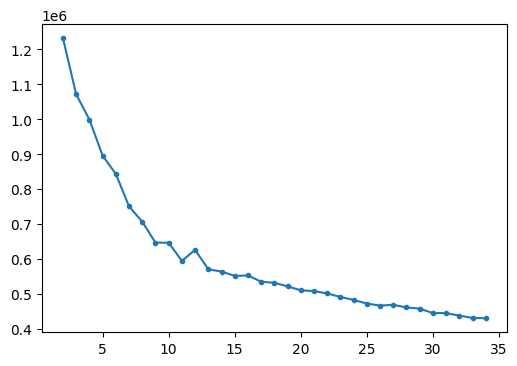

In [ ]:
cluster_range = range(2,35)
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans(num_clusters)
  clusters.fit(data1)
  cluster_errors.append(clusters.inertia_)

plt.figure(figsize=(6,4))
plt.plot(cluster_range, cluster_errors, marker = '.');


In [ ]:
print(cluster_errors)

[1231903.436341941, 1071179.3239275971, 999199.5640497932, 895630.5467054207, 843231.447203217, 750596.3782730383, 706473.263036201, 646630.57025952, 646393.2193754492, 594329.5148329661, 625971.1061461855, 570283.7823822538, 563826.6235025353, 551317.4981320787, 552710.9551075463, 534751.6077191825, 531582.407511395, 521313.28355533886, 510179.0828441494, 507821.96167060046, 501076.2229758382, 491136.07625686424, 482673.5533067614, 472133.1680093307, 466301.41853552, 468640.78096551524, 460970.7932778236, 457709.6877096068, 444874.73526812036, 444793.1946986628, 437576.2305233739, 431024.7501387501, 430010.27887265675]


In [ ]:
k = 7
clusters = KMeans(k, random_state = 42)
clusters.fit(data1)
silhouette_score(data1, clusters.labels_, metric='euclidean')
# data1['clusterid'] = clusters.labels_

0.2395302071337343

In [ ]:
data1.head()

age      race  admission_type_id  num_medications  num_lab_procedures  \
0 -3.824600  0.427557           2.750800        -1.848268           -0.106517   
1 -3.197277  0.427557          -0.708461         0.243390            0.808384   
2 -2.569954 -1.703706          -0.708461        -0.371804           -1.631351   
3 -1.942632  0.427557          -0.708461        -0.002688            0.045967   
4 -1.315309  0.427557          -0.708461        -0.986997            0.401761   

   time_in_hospital  number_outpatient  number_inpatient  number_diagnoses  \
0         -1.137649          -0.291461         -0.503276         -3.321596   
1         -0.467653          -0.291461         -0.503276          0.815784   
2         -0.802651           1.286748          0.288579         -0.735733   
3         -0.802651          -0.291461         -0.503276         -0.218561   
4         -1.137649          -0.291461         -0.503276         -1.252906   

     change  diabetesMed  clusterid  
0  0.926591    -1.829868          4  
1 -1.079225     0.546488          4  
2  0.926591     0.546488          4  
3 -1.079225     0.546488          4  
4 -1.079225     0.546488          4

In [ ]:
X = data1.drop('clusterid', axis=1)
y = data1['clusterid']

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X_res, y_res, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
pipeline = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}
for name, model in pipeline.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    print(f"{name} Accuracy: {accuracy}")

Logistic Regression Accuracy: 0.9978906714200831
K-Nearest Neighbors Accuracy: 0.972311348781937
Random Forest Accuracy: 0.9849376114081997


In [ ]:
param_grid = [
    {'C': [1,2,5,10,20,100]},
    {'n_neighbors': [3,5,7,10], 'weights': ['uniform', 'distance']},
    {'n_estimators': [10,50,100,200], 'max_depth': [None,10,20,30], 'criterion': ['gini', 'entropy', 'log_loss'], 'max_features': ['auto', 'sqrt', 'log2']}
]

Logistic Regression Accuracy: 0.9992275698158051


<Figure size 800x600 with 0 Axes>

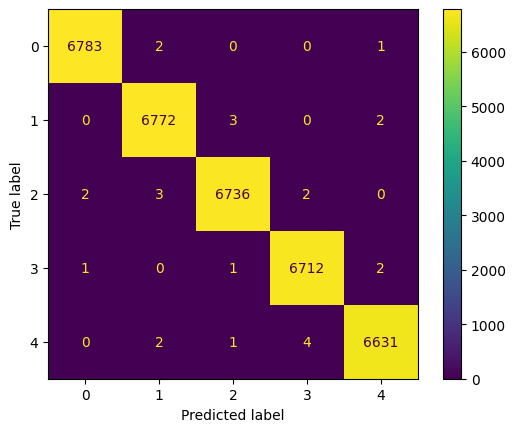

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6786
           1       1.00      1.00      1.00      6779
           2       1.00      1.00      1.00      6741
           3       1.00      1.00      1.00      6718
           4       1.00      1.00      1.00      6636

    accuracy                           1.00     33660
   macro avg       1.00      1.00      1.00     33660
weighted avg       1.00      1.00      1.00     33660

K-Nearest Neighbors Accuracy: 0.9773618538324421


<Figure size 800x600 with 0 Axes>

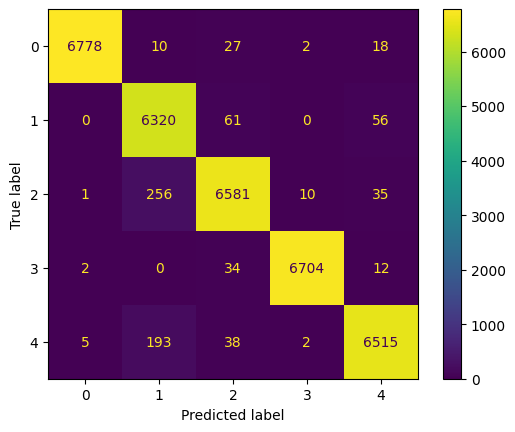

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6786
           1       0.98      0.93      0.96      6779
           2       0.96      0.98      0.97      6741
           3       0.99      1.00      1.00      6718
           4       0.96      0.98      0.97      6636

    accuracy                           0.98     33660
   macro avg       0.98      0.98      0.98     33660
weighted avg       0.98      0.98      0.98     33660



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Random Forest Accuracy: 0.985204991087344


<Figure size 800x600 with 0 Axes>

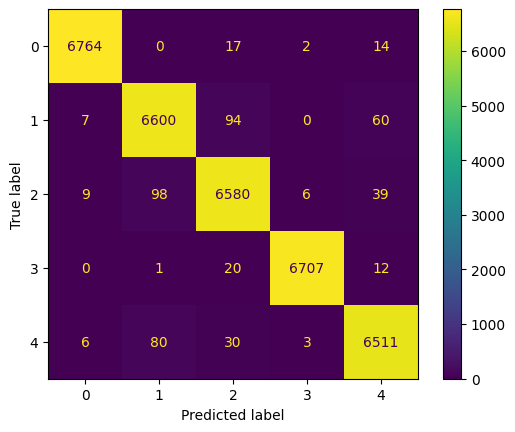

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6786
           1       0.98      0.97      0.97      6779
           2       0.98      0.98      0.98      6741
           3       1.00      1.00      1.00      6718
           4       0.98      0.98      0.98      6636

    accuracy                           0.99     33660
   macro avg       0.99      0.99      0.99     33660
weighted avg       0.99      0.99      0.99     33660



In [ ]:
for name, model in pipeline.items():
    grid_search = GridSearchCV(model, param_grid[list(pipeline.keys()).index(name)], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    classification_rep = classification_report(y_val, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_pred, y_val, labels=pipeline[name].classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline[name].classes_)
    disp.plot()
    plt.show()
    print(f"{name} Classification Report:\n{classification_rep}")

In [ ]:
X_combined = pd.concat([X_train, X_val])
y_combined = pd.concat([y_train, y_val])

Logistic Regression Accuracy: 0.9991384432560904


<Figure size 800x600 with 0 Axes>

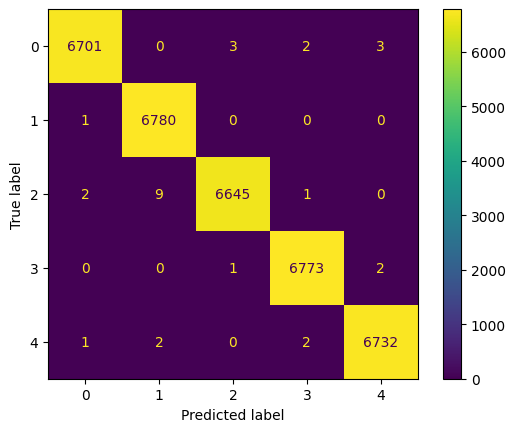

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6705
           1       1.00      1.00      1.00      6791
           2       1.00      1.00      1.00      6649
           3       1.00      1.00      1.00      6778
           4       1.00      1.00      1.00      6737

    accuracy                           1.00     33660
   macro avg       1.00      1.00      1.00     33660
weighted avg       1.00      1.00      1.00     33660

K-Nearest Neighbors Accuracy: 0.9775103980986334


<Figure size 800x600 with 0 Axes>

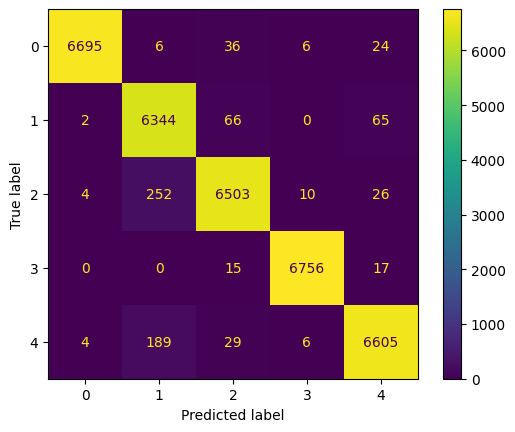

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6705
           1       0.98      0.93      0.96      6791
           2       0.96      0.98      0.97      6649
           3       1.00      1.00      1.00      6778
           4       0.97      0.98      0.97      6737

    accuracy                           0.98     33660
   macro avg       0.98      0.98      0.98     33660
weighted avg       0.98      0.98      0.98     33660



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Random Forest Accuracy: 0.9864230540701129


<Figure size 800x600 with 0 Axes>

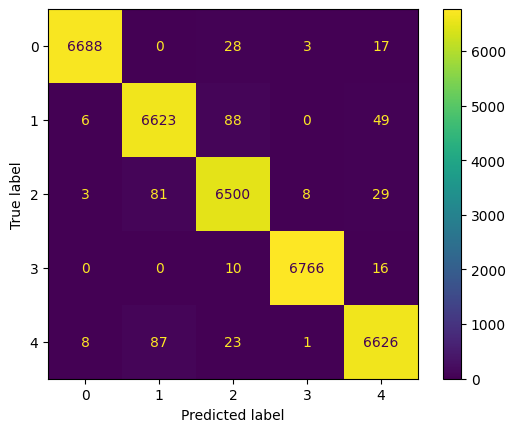

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6705
           1       0.98      0.98      0.98      6791
           2       0.98      0.98      0.98      6649
           3       1.00      1.00      1.00      6778
           4       0.98      0.98      0.98      6737

    accuracy                           0.99     33660
   macro avg       0.99      0.99      0.99     33660
weighted avg       0.99      0.99      0.99     33660



In [ ]:
for name, model in pipeline.items():
    grid_search = GridSearchCV(model, param_grid[list(pipeline.keys()).index(name)], cv=5, scoring='accuracy')
    grid_search.fit(X_combined, y_combined)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_pred, y_test, labels=pipeline[name].classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline[name].classes_)
    disp.plot()
    plt.show()
    print(f"{name} Classification Report:\n{classification_rep}")

# Predictive modelling
Addressing Imbalanced Classes

 The readmitted variable exhibited significant imbalance. Synthetic Minority Oversampling
 Technique (SMOTE) was applied to balance the classes and improve model performance.


  Classification Models

 Three models were trained to predict readmission:
 1. Logistic Regression
 2. K-Nearest Neighbors (KNN)
 3. RandomForest Classifier


  Model Training and Validation
 ● Datawassplit into training, validation, and test sets.
 ● Accuracy scores on the validation set:

 ○ Logistic Regression: 99.78%
 ○ KNN:97.23%
 ○ RandomForest: 98.49%

 Hyperparameter Tuning


 GridSearchCV was employed to fine-tune hyperparameters for each model, enhancing their
 accuracy





# *Unsupervised Learning: Clustering*

 Scaling Features

 Key variables like time_in_hospital, num_lab_procedures, and num_medications
 were standardized using StandardScaler to improve clustering performance.

  K-Means Clustering

 The elbow method was used to determine the optimal number of clusters. Based on the results:

 ● Patients were grouped into 4 clusters.
 ● ASilhouette Score of 0.24 was achieved, indicating moderate cluster separation.


 Cluster Visualization

 ● 2DPlots: Pair plots illustrated clustering patterns.
 ● 3DInteractive Plots: Explored patient clusters using features like time in hospital and
 number of medications.# Predictive modelling
Addressing Imbalanced Classes

 The readmitted variable exhibited significant imbalance. Synthetic Minority Oversampling
 Technique (SMOTE) was applied to balance the classes and improve model performance.


  Classification Models

 Three models were trained to predict readmission:
 1. Logistic Regression
 2. K-Nearest Neighbors (KNN)
 3. RandomForest Classifier


  Model Training and Validation
 ● Datawassplit into training, validation, and test sets.
 ● Accuracy scores on the validation set:

 ○ Logistic Regression: 99.78%
 ○ KNN:97.23%
 ○ RandomForest: 98.49%

 Hyperparameter Tuning


 GridSearchCV was employed to fine-tune hyperparameters for each model, enhancing their
 accuracy





# *Unsupervised Learning: Clustering*

 Scaling Features

 Key variables like time_in_hospital, num_lab_procedures, and num_medications
 were standardized using StandardScaler to improve clustering performance.

  K-Means Clustering

 The elbow method was used to determine the optimal number of clusters. Based on the results:

 ● Patients were grouped into 4 clusters.
 ● ASilhouette Score of 0.24 was achieved, indicating moderate cluster separation.


 Cluster Visualization

 ● 2DPlots: Pair plots illustrated clustering patterns.
 ● 3DInteractive Plots: Explored patient clusters using features like time in hospital and
 number of medications.

# Project Overview:

 This project analyzes a dataset of diabetic patients collected from 130 U.S. hospitals between
 1999 and 2008. The dataset, sourced from Kaggle, contains information on various online gaming related attributes, including:



*  age
* race
* admission_type_id
* num_medications
* num_lab_procedures
* time_in_hospital
* number_outpatient
* number_inpatient
* number_diagnoses
* change
* diabetesMed

To understand the data and identify potential relationships between variables, we conducted exploratory data analysis (EDA). This involved visualizing the data through various plots, such as bar graph, scatter plot and line graph.

After exploring the data, we experimented with different classification models, including logistic regression, random forest classifier and K-Nearest Neighbors . These models were evaluated using metrics such as Accuracy Score, Confusion Matrix and Classification Report. Based on the evaluation results,
 Accuracy scores on the validation set:

○ Logistic Regression: 99.78%

○ KNN:97.23%

○ RandomForest: 98.49%

we selected the random forest classifier as the most effective model for classifying engagement level of an individual.

Dataset Source:
https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008


## Conclusion:

 This project successfully demonstrated the use of data preprocessing, clustering, and
 classification to analyze and predict hospital readmissions in diabetic patients. Key takeaways
 include:

 ● Effective feature selection and scaling are crucial for model performance.

 ● Logistic Regression and Random Forest are highly accurate in predicting patient
 readmission.

 ● Clustering analysis can identify distinct patient groups for targeted healthcare
 interventions